# *k*-Nearest Neighbor

We'll implement *k*-Nearest Neighbor (*k*-NN) algorithm for this assignment. We will use the **madelon** dataset as in Programming Assignment 0.  

A skeleton of a general supervised learning model is provided in "model.ipynb". The functions that will be implemented there will be indicated in this notebook. 

### Assignment Goals:
In this assignment, we will:
* implement 'Euclidean' and 'Manhattan' distance metrics 
* use the validation dataset to find a good value for *k*
* evaluate our model with respect to performance measures:
    * accuracy, generalization error
    * confusion matrix
    *  Receiver Operating Characteristic (ROC) curve
* try to assess if *k*-NN is suitable for the dataset

## Note:

You are not required to follow this exact template. You can change what parameters your functions take or partition the tasks across functions differently. However, make sure there are outputs and implementation for items listed in the rubric for each task. Also, indicate in code with comments which task you are attempting.

# GRADING

You will be graded on parts that are marked with **TODO** comments. Read the comments in the code to make sure you don't miss any.

### Mandatory for 478 & 878:

|   | Tasks                      | 478 | 878 |
|---|----------------------------|-----|-----|
| 1 | Implement `distance`       |  15 |  15 |
| 2 | Implement `k-NN` methods   |  35 |  30 |
| 3 | Model evaluation           |  25 |  20 |
| 5 | ROC curve analysis         |  25 |  25 |

### Mandatory for 878, bonus for 478

|   | Tasks          | 478 | 878 |
|---|----------------|-----|-----|
| 4 | Optimizing *k* | 10  | 10  |

### Bonus for 478/878

|   | Tasks          | 478 | 878 |
|---|----------------|-----|-----|
| 6 | Assess suitability of *k*-NN | 10  | 10  |

Points are broken down further below in Rubric sections. The **first** score is for 478, the **second** is for 878 students. There are a total of 100 points in this assignment and extra 20 bonus points for 478 students and 10 bonus points for 878 students.

# YOUR GRADE

### Group Members:

|   | Tasks                      | Points |
|---|----------------------------|-----|
| 1 | Implement `distance`       |     |
| 2 | Implement `k-NN` methods   |     |
| 3 | Model evaluation           |     |
| 4 | Optimizing *k*             |     |
| 5 | ROC curve analysis         |     |
| 6 | Assess suitability of *k*-NN|    |



You can use numpy for array operations and matplotlib for plotting for this assignment. Please do not add other libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Following code makes the Model class and relevant functions available from model.ipynb.

In [2]:
%run 'model.ipynb'

## TASK 1: Implement `distance` function

Choice of distance metric plays an important role in the performance of *k*-NN. Let's start with implementing a distance method  in the "distance" function in **model.ipynb**. It should take two data points and the name of the metric and return a scalar value.

### Rubric:
* Euclidean +7.5, +7.5
* Manhattan +7.5, +7.5

### Test `distance`

In [3]:
x = np.array(range(100))
y = np.array(range(100,200))

dist_euclidean = distance(x, y, 'Euclidean')
dist_manhattan = distance(x, y, 'Manhattan')
print('Euclidean distance: {}, Manhattan distance: {}'.format(dist_euclidean, dist_manhattan))


Euclidean distance: 1000.0, Manhattan distance: 10000


## TASK 2: Implement *k*-NN Class Methods

We can start implementing our *k*-NN classifier. *k*-NN class inherits Model class. Use the "distance" function you defined above. "fit" method takes *k* as an argument. "predict" takes as input an *mxd* array containing *d*-dimensional *m* feature vectors for examples and for each input point outputs the predicted class and the ratio of positive examples in *k* nearest neighbors.

### Rubric:
* correct implementation of fit method +10, +10
* correct implementation of predict method +25, +20

In [4]:
class kNN(Model):
    '''
    Inherits Model class. Implements the k-NN algorithm for classification.
    '''
    
    def fit(self, training_features, training_labels, k, distance_f,**kwargs):
        '''
        Fit the model. This is pretty straightforward for k-NN.
        Args:
            training_features: ndarray
            training_labels: ndarray
            k: int
            distance_f: function
            kwargs: dict
                Contains keyword arguments that will be passed to distance_f
        '''
        # TODO
        # set self.train_features, self.train_labels, self.k, self.distance_f, self.distance_metric
        
        self.training_features = training_features
        self.training_labels = training_labels
        self.k = k
        self.distance_f = distance_f
        self.distance_metric = kwargs['metric']
        
        return
    
    def set_k(self,k):
        self.k =k
    
    def print_model(self):
    
        print(self.k)
        print(self.distance_metric)
        print(len(self.training_features))

        return
    
    def predict(self,test_features):
        '''
        Args:
            test_features: ndarray
                mxd array containing features for the points to be predicted
        Returns: 
            preds: ndarray
                mx1 array containing proportion of positive class among k nearest neighbors of each test point
        '''
        # TODO
        
        # for each point 
        # use your implementation of distance function
        #  distance_f(..., distance_metric)
    
        # to find the labels of k-nearest neighbors. 

        # You'll need proportion of positive examples
        # in k nearest neighbors
        
        preds=[]
        for i in range(test_features.shape[0]):
            dist=[]
            for j in range(self.training_features.shape[0]):
                dist.append([self.distance_f(test_features[i],self.training_features[j],self.distance_metric)
                            ,self.training_labels[j]])
            
            dist=sorted(dist)
            count = 0
            for k in range (self.k):
                if dist[k][1] > 0:
                    count+=1
            positive_ratio = float(count)/float(self.k)
            preds.append(positive_ratio)
        
        return preds
    

## TASK 3: Build and Evaluate the Model

### Rubric:
* Reasonable accuracy values +10, +5
* Reasonable confidence intervals on the error estimate +10, +10
* Reasonable confusion matrix +5, +5

Preprocess the data files and partition the data.

In [5]:
# initialize the model
my_model = kNN()
# obtain features and labels from files
features, labels = preprocess(feature_file='../data/madelon.data', label_file='../data/madelon.labels')
# get class names (unique entries in labels)
classes = np.unique(labels)
# partition the data set
test_indices, val_indices, train_indices = partition(size=features.shape[0], t = 0.3, v = 0.1)
test_features = features[test_indices]
test_labels = labels[test_indices]
val_features = features[val_indices]
val_labels = labels[val_indices]
train_features = features[train_indices]
train_labels = labels[train_indices]

Assign a value to *k* and fit the *k*-NN model.

In [6]:
# pass the training features and labels to the fit method
my_model.fit(training_features=train_features, training_labels=train_labels, k=10,distance_f=distance,metric='Euclidean')

### Computing the confusion matrix for *k* = 10
Now that we have the true labels and the predicted ones from our model, we can build a confusion matrix and see how accurate our model is. Implement the "conf_matrix" function (in model.ipynb) that takes as input an array of true labels (*true*) and an array of predicted labels (*pred*). It should output a numpy.ndarray. You do not need to change the value of the threshold parameter yet.

In [7]:
# TODO

# get model predictions
preds = my_model.predict(test_features)
# For now, we will consider a data point as predicted in positive class if more than 0.5 
# of its k-neighbors are positive examples.
threshold = 0.5

# convert predicted ratios to predicted labels
pred_labels = []
for p in preds:
    if p > threshold:
        pred_labels.append(1)
    else:
        pred_labels.append(-1)

# show the distribution of predicted and true labels in a confusion matrix
confusion = conf_matrix(test_labels,pred_labels)


Evaluate your model on the test data and report your **accuracy**. Also, calculate and report the 95% confidence interval on the generalization **error** estimate.

In [8]:
# TODO
# Calculate and report accuracy and generalization error with confidence interval here. Show your work in this cell.
diagonal = np.trace(confusion)
conf_total = np.sum(confusion)
accuracy = diagonal/conf_total

error = 1 - accuracy
std_error = ((error*(1-error)) / conf_total) ** 0.5
z = 1.96
lower_bound = error - (std_error * z)
upper_bound = error + (std_error * z)

print('Accuracy: {}'.format(accuracy))
print('Confidence interval: {}-{}'.format(lower_bound, upper_bound))

Accuracy: 0.691666666667
Confidence interval: 0.271381234711-0.345285431956


## TASK 4: Determining *k*

### Rubric:
* Accuracies reported with various *k* values +5, +5
* Confusion matrix for new *k* +5, +5

We can use the validation set to come up with a *k* value that results in better performance in terms of accuracy.

Below calculate the accuracies for different values of *k* using the validation set. Report a good *k* value and use it in the analyses that follow this section. Report confusion matrix for the new value of *k*.

In [9]:
# TODO

# Change values of k. 
# Calculate accuracies for the validation set.
# Report a good k value.
# Calculate the confusion matrix for new k.
best_accuracy = 0.0
best_k = 1
best_confusion = []
for k in range(1,11):
    my_model.set_k(k)
    preds = my_model.predict(val_features)
    pred_labels = []
    for p in preds:
        if p > threshold:
            pred_labels.append(1)
        else:
            pred_labels.append(-1)
    confusion = conf_matrix(val_labels,pred_labels)
    diagonal = np.trace(confusion)
    conf_total = np.sum(confusion)
    accuracy = diagonal/conf_total
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_confusion = confusion
    print("K: " + str(k) + ", Accuracy: " + str(accuracy))

print("Best K: " + str(best_k))
print("Best Accuracy: " + str(best_accuracy))
print("Best Confusion Matrix: \n" + str(best_confusion))

K: 1, Accuracy: 0.615
K: 2, Accuracy: 0.59
K: 3, Accuracy: 0.635
K: 4, Accuracy: 0.62
K: 5, Accuracy: 0.655
K: 6, Accuracy: 0.64
K: 7, Accuracy: 0.665
K: 8, Accuracy: 0.65
K: 9, Accuracy: 0.695
K: 10, Accuracy: 0.69
Best K: 9
Best Accuracy: 0.695
Best Confusion Matrix: 
[[67. 22.]
 [39. 72.]]


## TASK 5: ROC curve analysis
* Correct implementation +25, +25

ROC curves are a good way to visualize sensitivity vs. 1-specificity for varying cut off points. Now, implement, in **model.ipynb**, a "ROC" function. "ROC" takes a list containing different threshold values to try and returns two arrays; one where each entry is the sensitivity at a given threshold and the other where entries are 1-specificities.

Use the *k* value you found above, if you completed TASK 4, else use *k* = 10 to plot the ROC curve for values between 0.1 and 1.0.

In [10]:
my_model.set_k(best_k)
preds = my_model.predict(val_features)

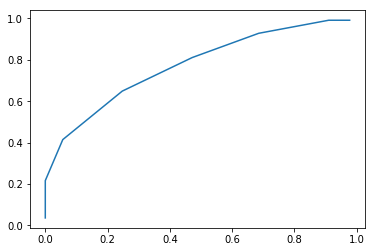

In [11]:
# TODO
# ROC curve
#my_model.set_k(10)
#preds = my_model.predict(val_features)
roc_sens, roc_spec_ = ROC(val_labels, preds, np.arange(0.1, 1.0, 0.1))
plt.plot(roc_spec_,roc_sens)
plt.show()

## TASK 6: Assess suitability of *k*-NN to your dataset
* +10, +10

Insert a cell below to write about your understanding of why *k*-NN performed well if it did or why not if it didn't. What properties of the dataset could have affected the performance of the algorithm?